# Bank Marketing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(42)

In [3]:
df = pd.read_csv('data/bank-additional.csv',delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2.0,999,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


## Exploratory analysis

In [4]:
df.shape

(4119, 21)

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4116 non-null   float64
 11  campaign        4114 non-null   float64
 12  pdays           4119 non-null   int64  
 13  previous        4117 non-null   float64
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4116 non-null   float64
 16  cons.price.idx  4117 non-null   float64
 17  cons.conf.idx   4117 non-null   f

Both numerical and categorical attributes are present in this data set. Also, we can see that there are some null values since the total number of rows is 4119, but some columns like emp.var.rate have less non-null values

In [7]:
# total number of missing values
df.isna().sum().sum()

21

In [8]:
# number of missing values by columns
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          3
campaign          5
pdays             0
previous          2
poutcome          0
emp.var.rate      3
cons.price.idx    2
cons.conf.idx     2
euribor3m         2
nr.employed       1
y                 1
dtype: int64

In [9]:
categorical_columns = ['job','marital','education','default','housing',
                       'loan','contact','month','day_of_week','poutcome','y']
numerical_columns = ['age', 'campaign','emp.var.rate','cons.price.idx',
                     'cons.conf.idx','euribor3m']

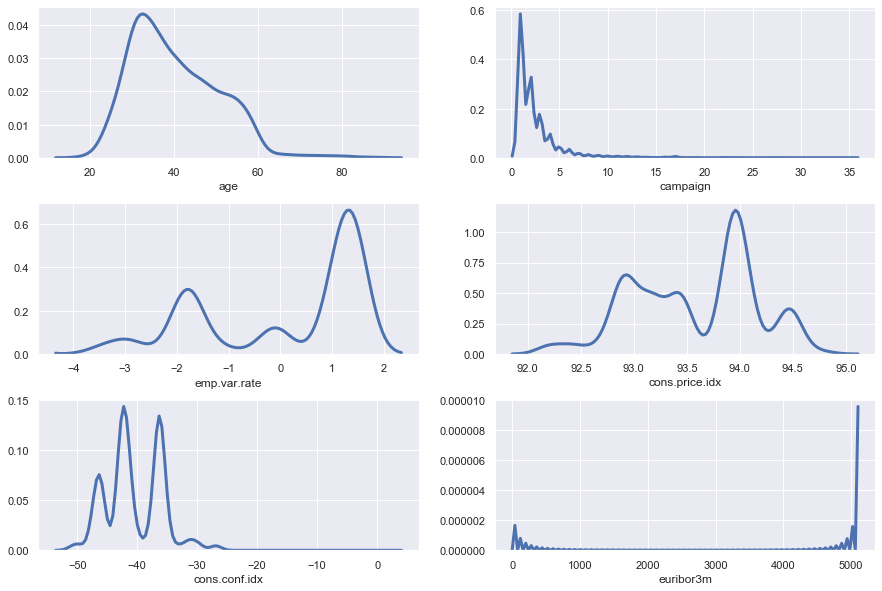

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
fig.subplots_adjust(hspace=0.3)
for ax, catplot in zip(axes.flatten(), df[numerical_columns].columns):
    sns.distplot(df[catplot], ax = ax, hist = False, kde = True,
             kde_kws = {'linewidth': 3})

We can notice that the attribute age has almost normal distribution with a longer tail to the right, which means we have a larger number of younger clients. For the attribute campaign we can see that the distribution is moved to the left, we have more clients which have been contacted a smaller number of times. More clients have a larger value of attribute emp.var.rate although there are some oscillations. The attribute cons.price.idx has oscillations as well. The distribution of the attribute cons.conf.idx is moved to the left and has oscillations. For the attribute euribor3m we can see that there are two spikes.

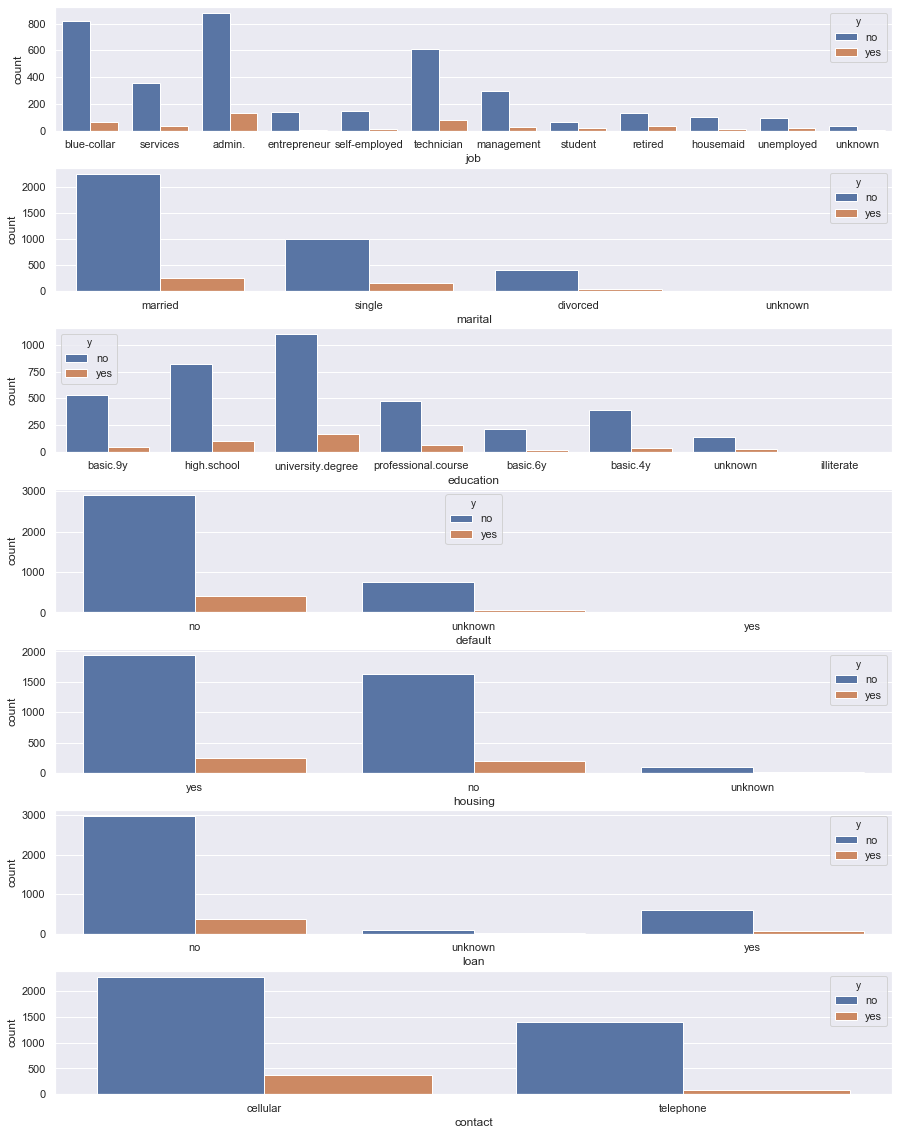

In [11]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(15,20))
fig.subplots_adjust(hspace=0.3)
for ax, catplot in zip(axes.flatten(), df[categorical_columns].columns):
     sns.countplot(x=catplot, hue = 'y', data=df, ax=ax)

We can notice a large imbalance in the data.

In [12]:
df_cat = df.select_dtypes(include = ['object'])
df_num = df.select_dtypes(exclude = ['object'])

In [13]:
df_cat.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,nr.employed,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4118,4118
unique,12,4,8,3,3,3,2,10,5,3,12,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,5228.1,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,1625,3667


We can se that only two categorical attributes have 1 missing value. The most frequent profession is admin, more then half of the people in this dataset are married and about 1/4 has university degree. Almost no one has a loan (3349 out  of 4119) and half doesn't have housing loan.

In [14]:
df_num.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
count,4119.000000,4116.000000,4114.000000,4119.000000,4117.000000,4116.000000,4117.000000,4117.000000,4117.000000
mean,40.113620,256.869048,2.534273,960.422190,0.190430,0.084694,93.579540,-40.486358,4.858993
std,10.313362,254.763913,2.566673,191.922786,0.541904,1.563361,0.579442,4.639840,79.432456
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000
75%,47.000000,317.250000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,1.266000,5099.100000


All quantiles have the same value for pdays - 999 which means that most people in this dataset weren't contacted before. The same information we have from the attribute previous. Since meadian and mean have similar values we can assume that attributes have normal distriburion except for attribute duration

In [15]:
df[df['y'] == 'yes'].shape[0] / df.shape[0]

0.10949259529011895

We can conlude that the number of clients who opened a savings account amounts almost 11% which means that we have an unbalanced class which we predict.

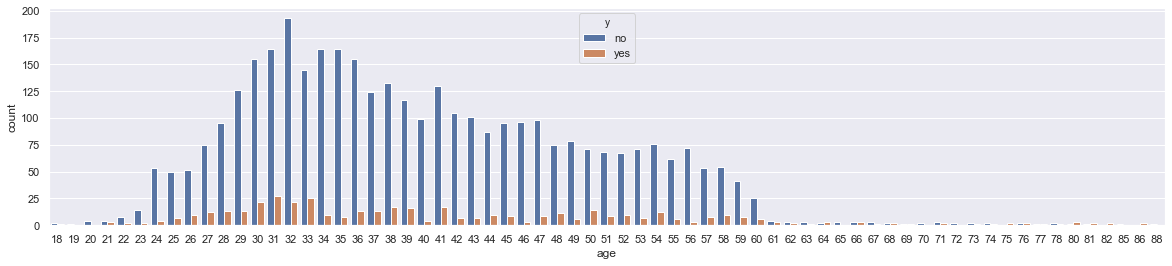

In [16]:
plt.figure(figsize=(20,4))
sns.countplot(x='age', hue='y', data=df)

Also, we can se that those who did open an account mostly did it in their 30s.

In [17]:
pd.crosstab(df['job'], df['y'], normalize = True)

y,no,yes
job,,
admin.,0.213453,0.032297
blue-collar,0.199611,0.014813
entrepreneur,0.033997,0.001943
housemaid,0.024041,0.002671
management,0.071394,0.007285
retired,0.031083,0.009228
self-employed,0.035454,0.003157
services,0.086935,0.008499
student,0.015299,0.004614


We notice that people in the following positions decided to save: admin, blue - collar, technician. As these are average professions, we can conclude that they want to be safe, while people who earn better, such as entrepreneurs, have no reason for something like this. The cleaners will not open a savings account because their income is too low.

In [18]:
pd.crosstab(df['marital'], df['y'], normalize = True)

y,no,yes
marital,,
divorced,0.097863,0.010442
married,0.547839,0.061195
single,0.242351,0.037640
unknown,0.002428,0.000243


Married people mostly open savings accounts which is expected.

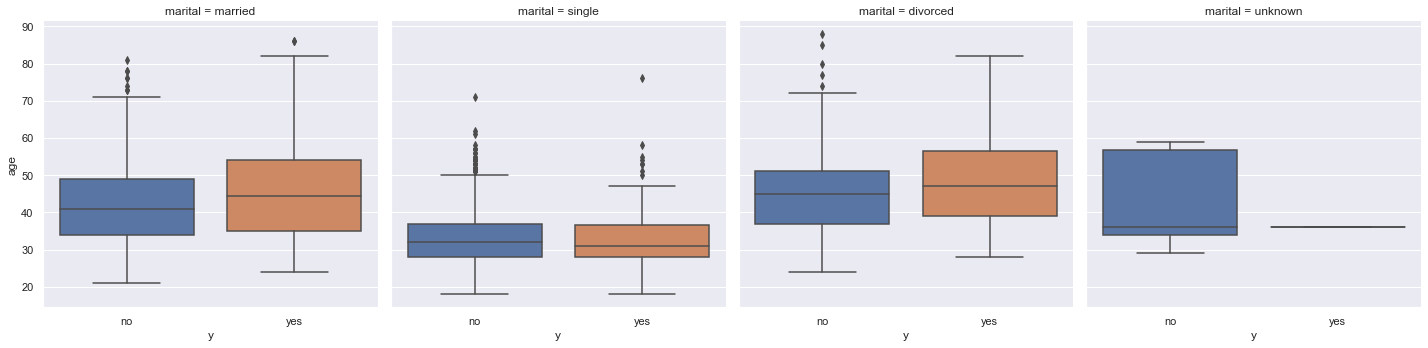

In [19]:
sns.catplot(x='y', y='age', col='marital', data=df, kind='box')

Single people oppened savings accounts in an earlier age then married people (they probbably had some other costs).

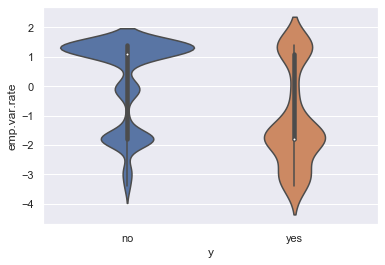

In [20]:
sns.violinplot(x='y', y='emp.var.rate', data=df)

When emp.var.rate is negative there are more people who decided to save.

In [21]:
df[df['pdays']==999].shape[0]/df.shape[0]

0.9611556202961884

96% of the people in the data set were not contacted which is why this attribute is not relevant and will be deleted.

In [22]:
df[df['default']=='no'].shape[0]/df.shape[0]

0.8048069919883467

In [23]:
df[df['default']=='yes'].shape

(1, 21)

Since 80% of dataset doesn't have credit in default and only 1 case has and the rest is unknown, this attribute won't be used for predictions.

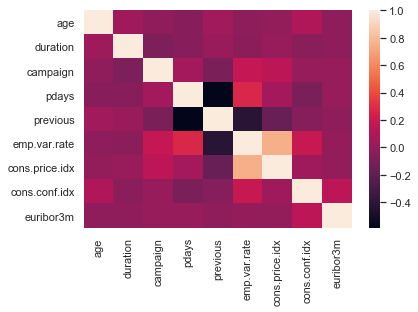

In [24]:
corr_matrix = df_num.corr(method='pearson')
sns.heatmap(corr_matrix)

There is high negative correlation between attribute previous and attributes euribor3m, nr.employed and emp.var.rate. There are high positive correlation among social and economic attributes. 

## Data preparation

In [25]:
# delete the attributes which aren't significant for the prediction
df.drop('default',axis = 1, inplace = True)
df.drop('pdays',axis = 1, inplace = True)
df_num.drop('pdays',axis=1, inplace = True)

In [26]:
df[df['nr.employed']=='no']

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
780,32,blue-collar,married,basic.4y,no,yes,cellular,may,thu,80.0,4.0,0.0,nonexistent,-1.8,92.893,1.266,5099.1,no,NaN


In [27]:
# invalid value for attribute nr.employed
df = df.drop(780)
df.reset_index(drop = True)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,yes,no,cellular,may,fri,487.0,2.0,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,telephone,may,fri,346.0,4.0,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
2,25,services,married,high.school,yes,no,telephone,jun,wed,227.0,1.0,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,unknown,unknown,telephone,jun,fri,17.0,3.0,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,yes,no,cellular,nov,mon,58.0,1.0,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4113,30,admin.,married,basic.6y,yes,yes,cellular,jul,thu,53.0,1.0,0.0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4114,39,admin.,married,high.school,yes,no,telephone,jul,fri,219.0,1.0,0.0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4115,27,student,single,high.school,no,no,cellular,may,mon,64.0,2.0,1.0,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4116,58,admin.,married,high.school,no,no,cellular,aug,fri,528.0,1.0,0.0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [28]:
# wrong type
df['nr.employed'] = df['nr.employed'].astype('float64')

### Handling missing data

In [29]:
df.isna().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          3
campaign          5
previous          2
poutcome          0
emp.var.rate      3
cons.price.idx    2
cons.conf.idx     2
euribor3m         2
nr.employed       1
y                 0
dtype: int64

From distributions above we can conclude that the best option for these attributes is to handle missing values by replaceing them with mode values. The only attribute for which median will be used is duration.

In [30]:
def fill_missing_mode(cols_with_na):
    for column in cols_with_na:
        df[column].fillna(df[column].mode()[0], inplace=True)

In [31]:
cols_to_fill = ['campaign', 'previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

In [32]:
fill_missing_mode(cols_to_fill)

In [33]:
df['duration'] = df['duration'].replace(np.NaN, df['duration'].median())

In [34]:
df.isna().sum().sum()

0

### Ordinal data

In [35]:
education_map_dict = {
    'illiterate' : 0,
    'unknown' : 1,
    'basic.4y' : 2,
    'basic.6y' : 3,
    'basic.9y' : 4,
    'high.school' : 5,
    'professional.course' : 6,
    'university.degree' : 7    
}
df['education'] = df['education'].replace(education_map_dict)

In [36]:
df['contact'].unique()

array(['cellular', 'telephone'], dtype=object)

In [37]:
contact_map_dict = {
    'cellular' : 0,
    'telephone' :1
}
df['contact'] = df['contact'].replace(contact_map_dict)

In [38]:
df['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [39]:
poutcome_map_dict = {
    'failure' : 0,
    'nonexistent' : 1,
    'success' : 2
}
df['poutcome'] = df['poutcome'].replace(poutcome_map_dict)

In [40]:
df['y'] = df['y'].map({'no':0, 'yes':1})

### Nominal data

In [41]:
df = pd.get_dummies(df, columns=['job', 'marital', 'loan', 'housing', 'day_of_week', 'month'], prefix = ['job', 'marital', 'loan', 'housing', 'day', 'month'])
df.head()

,age,education,contact,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,...,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,30,4,0,487.0,2.0,0.0,1,-1.8,92.893,-46.2,...,0,0,0,0,0,0,1,0,0,0
1,39,5,1,346.0,4.0,0.0,1,1.1,93.994,-36.4,...,0,0,0,0,0,0,1,0,0,0
2,25,5,1,227.0,1.0,0.0,1,1.4,94.465,-41.8,...,0,0,0,0,1,0,0,0,0,0
3,38,4,1,17.0,3.0,0.0,1,1.4,94.465,-41.8,...,0,0,0,0,1,0,0,0,0,0
4,47,7,0,58.0,1.0,0.0,1,-0.1,93.200,-42.0,...,0,0,0,0,0,0,0,1,0,0


In [42]:
df.drop(columns = ['marital_unknown', 'housing_unknown', 'loan_unknown', 'job_unknown'], inplace=True)

In [43]:
df.shape

(4118, 46)

### Outliers

In [44]:
columns = ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 
           'cons.conf.idx', 'euribor3m', 'nr.employed','duration']

In [45]:
from scipy import stats

z = np.abs(stats.zscore(df[columns]))
df = df[(z < 3).all(axis=1)]
df.shape

(3801, 46)

## Split to Train and Test

In [46]:
X = df.drop('y', axis=1)
y = df['y']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Scaling

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
X_train.head()

,age,education,contact,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,...,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.396226,1.000000,1.0,0.296369,0.000000,0.0,0.5,0.937500,0.698753,0.602510,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.301887,0.285714,1.0,0.228656,0.000000,0.0,0.5,0.937500,0.698753,0.602510,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.924528,1.000000,0.0,0.066732,0.333333,1.0,0.0,0.000000,0.174591,0.866109,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.471698,0.857143,1.0,0.250245,0.000000,0.0,0.5,0.937500,0.698753,0.602510,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.509434,0.571429,0.0,0.813543,0.000000,0.0,0.5,0.333333,0.250195,0.033473,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Balancing

Due to the imbalance of the class that we anticipate, it is necessary to perform balancing. At this point, it is not certain whether it is better to do undersample or oversample, so we will try both and make a decision based on the results.

In [48]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=0)
X_train_us, y_train_us = under_sampler.fit_resample(X_train, y_train)

In [49]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_train_os, y_train_os = sm.fit_sample(X_train, y_train.ravel())

In [50]:
print(f"Bez balansiranja: {X_train.shape}")
print(f"Undersample: {X_train_us.shape}")
print(f"Oversample: {X_train_os.shape}")

Bez balansiranja: (2660, 45)
Undersample: (444, 45)
Oversample: (4876, 45)


## Classification

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import cross_val_score

def eval_metrics(y_test, y_pred, y_pred_proba, model):    
    print(str(model).split('(')[0])
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Precision: ', precision_score(y_test, y_pred))
    print('Recall: ', recall_score(y_test, y_pred))
    print('Roc-auc: ', roc_auc_score(y_test, y_pred_proba))

In [52]:
metrics = ['accuracy', 'precision', 'recall', 'roc_auc']

def cross_validate(metrics, X_ev, y_ev, model):
    print(str(model).split('(')[0])
    for metric in metrics:
        print(metric.capitalize(),': ', cross_val_score(model, X_ev, y_ev, cv=10, scoring=metric).mean(), 
              '+/-', cross_val_score(model, X_ev, y_ev, cv=10, scoring=metric).std())

In [53]:
from sklearn.linear_model import LogisticRegression

# raw data
model_lr_raw = LogisticRegression()
model_lr_raw.fit(X_train, y_train)

# undersample data
model_lr_us = LogisticRegression()
model_lr_us.fit(X_train_us, y_train_us)

# oversample data
model_lr_os = LogisticRegression()
model_lr_os.fit(X_train_os, y_train_os)

LogisticRegression()

In [54]:
y_pred_raw = model_lr_raw.predict(X_test)
y_pred_us = model_lr_us.predict(X_test)
y_pred_os = model_lr_os.predict(X_test)

In [55]:
y_pred_proba_raw = model_lr_raw.predict_proba(X_test)
y_pred_proba_us = model_lr_us.predict_proba(X_test)
y_pred_proba_os = model_lr_os.predict_proba(X_test)

In [56]:
eval_metrics(y_test, y_pred_raw, y_pred_proba_raw[:,1], model_lr_raw)

LogisticRegression
Accuracy:  0.9290096406660824
Precision:  0.7631578947368421
Recall:  0.2871287128712871
Roc-auc:  0.9392421934501143


In [57]:
eval_metrics(y_test, y_pred_us, y_pred_proba_us[:,1], model_lr_us)

LogisticRegression
Accuracy:  0.8773006134969326
Precision:  0.40487804878048783
Recall:  0.8217821782178217
Roc-auc:  0.9371382330540746


In [58]:
eval_metrics(y_test, y_pred_os, y_pred_proba_os[:,1], model_lr_os)

LogisticRegression
Accuracy:  0.8764241893076249
Precision:  0.40654205607476634
Recall:  0.8613861386138614
Roc-auc:  0.9352913175932978


Since the goal of this project is creating a model which will predict whether a client will open a savings account or not, for them it is worse to say that the client will not do such a thing and it tourns out that he would, which means that we will optimize recall. We get the best results after oversampling so we move forward with this data.

In [59]:
X_train, y_train = X_train_os, y_train_os

### Model training with default parameters

#### Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train,y_train)
y_pred_tree_train = model_tree.predict(X_train)
y_pred_tree = model_tree.predict(X_test)
y_pred_proba_tree_train = model_tree.predict_proba(X_train)
y_pred_proba_tree = model_tree.predict_proba(X_test)

In [61]:
# evaluation on train set
eval_metrics(y_train, y_pred_tree_train, y_pred_proba_tree_train[:,1], model_tree)

DecisionTreeClassifier
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
Roc-auc:  1.0


In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred_tree_train)

array([[2438,    0],
       [   0, 2438]])

In [63]:
# cross validation on train set
cross_validate(metrics, X_train, y_train, model_tree)

DecisionTreeClassifier
Accuracy :  0.932737654424883 +/- 0.04441115121373486
Precision :  0.9159283540653609 +/- 0.013377041755470042
Recall :  0.9422046819132429 +/- 0.08556116746137023
Roc_auc :  0.9323391013964784 +/- 0.040831098058184134


In [64]:
# evaluation on test set
eval_metrics(y_test, y_pred_tree, y_pred_proba_tree[:,1], model_tree)

DecisionTreeClassifier
Accuracy:  0.8974583698510079
Precision:  0.4365079365079365
Recall:  0.5445544554455446
Roc-auc:  0.7381426123381569


In [65]:
confusion_matrix(y_test, y_pred_tree)

array([[969,  71],
       [ 46,  55]])

#### Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
model_lg = LogisticRegression()
model_lg.fit(X_train,y_train)
y_pred_lg_train = model_lg.predict(X_train)
y_pred_lg = model_lg.predict(X_test)
y_pred_proba_lg_train = model_lg.predict_proba(X_train)
y_pred_proba_lg = model_lg.predict_proba(X_test)

In [67]:
# evaluation on train set
eval_metrics(y_train, y_pred_lg_train, y_pred_proba_lg_train[:,1], model_lg)

LogisticRegression
Accuracy:  0.8925348646431501
Precision:  0.872954014029618
Recall:  0.918785890073831
Roc-auc:  0.9467733338896511


In [68]:
confusion_matrix(y_train, y_pred_lg_train)

array([[2112,  326],
       [ 198, 2240]])

In [69]:
# cross validation on train set
cross_validate(metrics, X_train, y_train, model_lg)

LogisticRegression
Accuracy :  0.889871074157606 +/- 0.013917304490335946
Precision :  0.8698495328448719 +/- 0.013298326894212736
Recall :  0.9171574580044526 +/- 0.023064178880235656
Roc_auc :  0.9433584604342167 +/- 0.009443813763559801


In [70]:
# evaluation on test set
eval_metrics(y_test, y_pred_lg, y_pred_proba_lg[:,1], model_lg)

LogisticRegression
Accuracy:  0.8764241893076249
Precision:  0.40654205607476634
Recall:  0.8613861386138614
Roc-auc:  0.9352913175932978


In [71]:
confusion_matrix(y_test, y_pred_lg)

array([[913, 127],
       [ 14,  87]])

#### KNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train,y_train)
y_pred_knn_train = model_knn.predict(X_train)
y_pred_knn = model_knn.predict(X_test)
y_pred_proba_knn_train = model_knn.predict_proba(X_train)
y_pred_proba_knn = model_knn.predict_proba(X_test)

In [73]:
# evaluation on train set
eval_metrics(y_train, y_pred_knn_train, y_pred_proba_knn_train[:,1], model_knn)

KNeighborsClassifier
Accuracy:  0.9214520098441346
Precision:  0.8644909542390918
Recall:  0.9995898277276456
Roc-auc:  0.9984681630271588


In [74]:
confusion_matrix(y_train, y_pred_knn_train)

array([[2056,  382],
       [   1, 2437]])

In [75]:
# cross validation on train set
cross_validate(metrics, X_train, y_train, model_knn)

KNeighborsClassifier
Accuracy :  0.8859797354158951 +/- 0.016881966589433126
Precision :  0.8163036884958327 +/- 0.020893096087592707
Recall :  0.9971311475409836 +/- 0.004508196721311469
Roc_auc :  0.9630207486593164 +/- 0.012081763179185643


In [76]:
# evaluation on test set
eval_metrics(y_test, y_pred_knn, y_pred_proba_knn[:,1], model_knn)

KNeighborsClassifier
Accuracy:  0.7852760736196319
Precision:  0.21653543307086615
Recall:  0.5445544554455446
Roc-auc:  0.7405464584920031


In [77]:
confusion_matrix(y_test, y_pred_knn)

array([[841, 199],
       [ 46,  55]])

#### Gaussian NB

In [78]:
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(X_train,y_train)
y_pred_gnb_train = model_gnb.predict(X_train)
y_pred_gnb = model_gnb.predict(X_test)
y_pred_proba_gnb_train = model_gnb.predict_proba(X_train)
y_pred_proba_gnb = model_gnb.predict_proba(X_test)

In [79]:
# evaluation on train set
eval_metrics(y_train, y_pred_gnb_train, y_pred_proba_gnb_train[:,1], model_gnb)

GaussianNB
Accuracy:  0.7639458572600493
Precision:  0.8171513060620995
Recall:  0.6800656275635767
Roc-auc:  0.8373644227540291


In [80]:
confusion_matrix(y_train, y_pred_gnb_train)

array([[2067,  371],
       [ 780, 1658]])

In [81]:
# cross validation on train set
cross_validate(metrics, X_train, y_train, model_gnb)

GaussianNB
Accuracy :  0.7610731477429563 +/- 0.017245522528002214
Precision :  0.8133738578751618 +/- 0.015891248720988564
Recall :  0.6776108075288403 +/- 0.03099664758540591
Roc_auc :  0.8342146654291127 +/- 0.023037342265878415


In [82]:
# evaluation on test set
eval_metrics(y_test, y_pred_gnb, y_pred_proba_gnb[:,1], model_gnb)

GaussianNB
Accuracy:  0.8334794040315513
Precision:  0.28502415458937197
Recall:  0.5841584158415841
Roc-auc:  0.804484006092917


In [83]:
confusion_matrix(y_test, y_pred_gnb)

array([[892, 148],
       [ 42,  59]])

Logistic regression gave the best results with default parameters.

### Optimization of model parameters

#### Decision Tree

In [84]:
from sklearn.model_selection import GridSearchCV
params_tree = {'criterion': ['entropy', 'gini'],
    'min_samples_leaf': range(1,20,2),
    'max_depth': range(2,20,2)}
grid_model_tree = GridSearchCV(DecisionTreeClassifier(), params_tree, cv=5, scoring='roc_auc')
grid_model_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(2, 20, 2),
                         'min_samples_leaf': range(1, 20, 2)},
             scoring='roc_auc')

In [85]:
grid_model_tree.best_estimator_

DecisionTreeClassifier(max_depth=18, min_samples_leaf=19)

In [86]:
best_tree = grid_model_tree.best_estimator_
best_tree.fit(X_train,y_train)
y_best_tree = best_tree.predict(X_test)
y_best_tree_proba = best_tree.predict_proba(X_test)

In [87]:
eval_metrics(y_test, y_best_tree, y_best_tree_proba[:,1], best_tree)

DecisionTreeClassifier
Accuracy:  0.880806310254163
Precision:  0.4011299435028249
Recall:  0.7029702970297029
Roc-auc:  0.8941784082254378


#### Logistic Regression

In [88]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats
params = {"penalty": ['l1', 'l2'],
          "C": scipy.stats.expon(scale=10)}

n_iter_search = 100

random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=params, n_iter=n_iter_search, cv=5, scoring='roc_auc')
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a25270390>,
                                        'penalty': ['l1', 'l2']},
                   scoring='roc_auc')

In [89]:
random_search.best_params_

{'C': 26.116627630420787, 'penalty': 'l2'}

In [90]:
best_lr = random_search.best_estimator_
best_lr.fit(X_train,y_train)
y_best_lr = best_lr.predict(X_test)
y_best_lr_proba = best_lr.predict_proba(X_test)

In [91]:
eval_metrics(y_test, y_best_lr, y_best_lr_proba[:,1], best_lr)

LogisticRegression
Accuracy:  0.880806310254163
Precision:  0.41545893719806765
Recall:  0.8514851485148515
Roc-auc:  0.9336443259710586


#### KNN

In [92]:
params_k = [1, 3, 5, 7, 9, 11, 13]
param_dist = ['euclidean', 'manhattan', 'chebyshev']

params_knn = [{'n_neighbors': params_k, 'metric': param_dist}] 

grid_model_knn = GridSearchCV(model_knn, params_knn, cv=5, scoring='roc_auc')
grid_model_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['euclidean', 'manhattan', 'chebyshev'],
                          'n_neighbors': [1, 3, 5, 7, 9, 11, 13]}],
             scoring='roc_auc')

In [93]:
grid_model_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 5}

In [94]:
best_knn = grid_model_knn.best_estimator_
best_knn.fit(X_train,y_train)
y_best_knn = best_knn.predict(X_test)
y_best_knn_proba = best_knn.predict_proba(X_test)

In [95]:
eval_metrics(y_test, y_best_knn, y_best_knn_proba[:,1], best_knn)

KNeighborsClassifier
Accuracy:  0.8764241893076249
Precision:  0.3387096774193548
Recall:  0.4158415841584158
Roc-auc:  0.7357625666412795


After choosing optimal parameters for models, logistic regression still gives the best results.

### Feature Selection

#### Variance Threshold - removing uninformative features

In [96]:
from sklearn.feature_selection import VarianceThreshold

variance = VarianceThreshold(threshold=0.03)
variance.fit(X_train)

X_train_reduced_var = pd.DataFrame(variance.transform(X_train), columns=X.columns[variance.get_support()])
X_train_reduced_var.shape

(4876, 36)

In [97]:
cols_var = X_train_reduced_var.columns
X_test_reduced_var = X_test[cols_var]
X_test_reduced_var.head()

,age,education,contact,duration,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,day_mon,day_thu,day_tue,day_wed,month_apr,month_aug,month_jul,month_jun,month_may,month_nov
0,0.377358,1.000000,0.0,0.101079,0.0,0.5,0.104167,0.296960,0.418410,0.107036,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.169811,0.714286,0.0,0.127576,0.0,0.5,1.000000,0.669135,0.338912,0.997232,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.094340,0.714286,0.0,0.246320,0.0,0.5,1.000000,0.669135,0.338912,0.997001,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.358491,1.000000,0.0,0.315996,1.0,0.0,0.333333,0.269680,0.192469,0.151326,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.226415,0.857143,0.0,0.096173,0.0,0.5,0.333333,0.269680,0.192469,0.151326,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [98]:
best_lr.fit(X_train_reduced_var,y_train)
y_var_lr = best_lr.predict(X_test_reduced_var)
y_var_lr_proba  = best_lr.predict_proba(X_test_reduced_var)
eval_metrics(y_test, y_var_lr, y_var_lr_proba[:,1], best_lr)

LogisticRegression
Accuracy:  0.880806310254163
Precision:  0.41706161137440756
Recall:  0.8712871287128713
Roc-auc:  0.9342726580350341


We got the best results so far by selecting only attributes whose variance is bigger then 0.03.

## Clustering

### Select k best - selection of 10 most informative features 

In [99]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

selection = SelectKBest(k=10, score_func=mutual_info_classif)
selection.fit(X_train, y_train)

X_train_k_best = pd.DataFrame(selection.transform(X_train), columns=X_train.columns[selection.get_support()])
X_train_k_best.columns

Index(['age', 'education', 'duration', 'campaign', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [100]:
df_k = df.loc[:,X_train_k_best.columns]
df_k['y'] = df['y']
df_k.head()

,age,education,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,4,487.0,2.0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,5,346.0,4.0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,5,227.0,1.0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,4,17.0,3.0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,7,58.0,1.0,1,-0.1,93.200,-42.0,4.191,5195.8,0


In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_clust = df_k.drop('y',axis = 1)
scaled_df = scaler.fit_transform(X_clust)
scaled_df = pd.DataFrame(scaled_df, columns=X_clust.columns)
scaled_df.head()

,age,education,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.226415,0.571429,0.477920,0.111111,0.5,0.333333,0.269680,0.192469,0.156401,0.512287
1,0.396226,0.714286,0.339549,0.333333,0.5,0.937500,0.698753,0.602510,0.973472,0.859735
2,0.132075,0.714286,0.222767,0.000000,0.5,1.000000,0.882307,0.376569,0.998155,1.000000
3,0.377358,0.571429,0.016683,0.222222,0.5,1.000000,0.882307,0.376569,0.997463,1.000000
4,0.547170,1.000000,0.056919,0.000000,0.5,0.687500,0.389322,0.368201,0.820300,0.877883


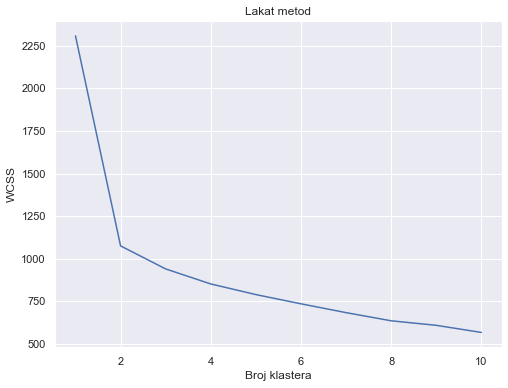

In [102]:
sns.set(rc={'figure.figsize':(8,6)})
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Lakat metod')
plt.xlabel('Broj klastera')
plt.ylabel('WCSS')
plt.show()

Using the elbow method we can conclude that optimal number of clusters is around 3.

In [103]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(scaled_df)

y_kmeans

array([0, 1, 1, ..., 0, 1, 1], dtype=int32)

In [104]:
unique, counts = np.unique(y_kmeans, return_counts=True)
unique, counts

(array([0, 1], dtype=int32), array([1164, 2637]))

In [105]:
df_k['cluster'] = y_kmeans
df_k.head()

,age,education,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,cluster
0,30,4,487.0,2.0,1,-1.8,92.893,-46.2,1.313,5099.1,0,0
1,39,5,346.0,4.0,1,1.1,93.994,-36.4,4.855,5191.0,0,1
2,25,5,227.0,1.0,1,1.4,94.465,-41.8,4.962,5228.1,0,1
3,38,4,17.0,3.0,1,1.4,94.465,-41.8,4.959,5228.1,0,1
4,47,7,58.0,1.0,1,-0.1,93.200,-42.0,4.191,5195.8,0,1


In [106]:
df_k[df_k['cluster']==0].describe()

,age,education,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,cluster
count,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.0
mean,39.195017,5.060137,241.823024,2.016323,0.812715,-2.028179,93.000778,-43.007045,1.188766,5075.740464,0.192440,0.0
std,10.671952,1.803739,182.072169,1.430743,0.538438,0.571805,0.479951,6.105811,0.245876,40.695481,0.394386,0.0
min,18.000000,0.000000,5.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000,0.000000,0.0
25%,31.000000,4.000000,113.000000,1.000000,0.000000,-1.800000,92.893000,-46.200000,1.029000,5076.200000,0.000000,0.0
50%,37.000000,5.000000,195.000000,2.000000,1.000000,-1.800000,92.893000,-46.200000,1.281000,5099.100000,0.000000,0.0
75%,46.000000,7.000000,324.250000,2.000000,1.000000,-1.800000,93.075000,-40.675000,1.334000,5099.100000,0.000000,0.0
max,71.000000,7.000000,1019.000000,10.000000,2.000000,1.400000,94.767000,-26.900000,1.811000,5099.100000,1.000000,0.0


In [107]:
df_k[df_k['cluster']==1].describe()

,age,education,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,cluster
count,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.0
mean,40.070155,4.985210,230.241562,2.398938,0.973075,1.099735,93.828248,-39.474554,4.807155,5213.259386,0.037543,1.0
std,9.235989,1.825924,189.551845,1.818001,0.173214,0.512096,0.396093,2.997832,0.289734,17.556494,0.190123,0.0
min,21.000000,1.000000,0.000000,1.000000,0.000000,-0.200000,92.756000,-45.900000,3.329000,5176.300000,0.000000,1.0
25%,32.000000,4.000000,100.000000,1.000000,1.000000,1.100000,93.444000,-42.000000,4.857000,5191.000000,0.000000,1.0
50%,39.000000,5.000000,169.000000,2.000000,1.000000,1.400000,93.918000,-41.800000,4.958000,5228.100000,0.000000,1.0
75%,47.000000,7.000000,293.000000,3.000000,1.000000,1.400000,93.994000,-36.400000,4.963000,5228.100000,0.000000,1.0
max,60.000000,7.000000,1014.000000,10.000000,2.000000,1.400000,94.465000,-36.100000,4.970000,5228.100000,1.000000,1.0


These 2 clusters have similar values of attribute age, but cluster number one has the oldest and the youngest people. Cluster number 1 has min value of attribute education which means we have illiterate people here. The first cluster has min duration equal to 5, but the second cluster has 0 which means that in the second cluster we have people who didn't answer the phone. Cluster number 2 has positive mean value of emp.var.rate while the first cluster has mean value of -2.028179. Cluster number 2 has slightly higher mean value of attribute euribor3m.

In [108]:
from sklearn.metrics import silhouette_score
silhouette_score(scaled_df,y_kmeans)

0.5099153387172626

The silhouette score is positive which is good.

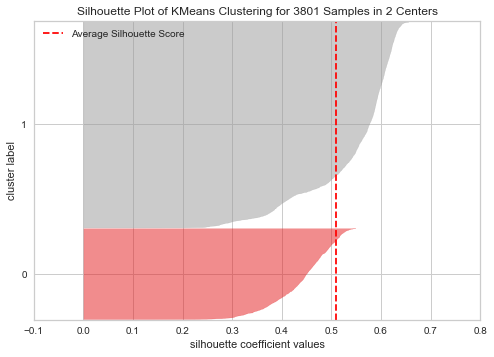

In [109]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(scaled_df)
visualizer.poof()

In [110]:
scaled_df['cluster'] = y_kmeans

In [111]:
X0 = scaled_df[scaled_df['cluster'] == 0].drop('cluster', axis=1)
X1 = scaled_df[scaled_df['cluster'] == 1].drop('cluster', axis=1)

In [112]:
df0 = df_k[df_k['cluster'] == 0]
df1 = df_k[df_k['cluster'] == 1]

y0 = df0['y']
y1 = df1['y']

In [113]:
cluster_lr = LogisticRegression()
cluster_lr.fit(X0,y0)
cross_validate(metrics, X0, y0, cluster_lr)

LogisticRegression
Accuracy :  0.8341511936339524 +/- 0.024309505856974518
Precision :  0.6567404817404817 +/- 0.14711734768728657
Recall :  0.3203557312252965 +/- 0.08956494702539702
Roc_auc :  0.8460053822218484 +/- 0.038285913766054


In [114]:
cluster_lr.fit(X1,y1)
cross_validate(metrics, X1, y1, cluster_lr)

LogisticRegression
Accuracy :  0.9613233091369976 +/- 0.005548132163211628
Precision :  0.3433333333333333 +/- 0.33134406421254764
Recall :  0.09999999999999999 +/- 0.1
Roc_auc :  0.9373105239315441 +/- 0.0336304196361079


Since roc auc is high and point metrics are low this  means that this classifier currently does a bad job, but we can find the threshold for which its score is decent.